# k-means 알고리즘으로 붓꽃 품종 분류하기

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
iris_df = pd.DataFrame(data = iris.data, columns= ['sepal_length'
                                                   ,'sepal_width'
                                                   ,'petal_length'
                                                   ,'petal_width'])

In [12]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
KM.fit(iris_df)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [14]:
iris_df['target'] = iris.target
iris_df['cluster'] = KM.labels_
iris_df.groupby(['target','cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64

target(0): 전부다 맞춤

target(1): 47대 3(오차)

target(2): 36대 14(오차)

## 실루엣 계수 측정

In [15]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_sample = silhouette_samples(iris.data , iris_df['cluster'])
iris_df['silhouette_codff'] = score_sample
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_codff
0,5.1,3.5,1.4,0.2,0,1,0.852582
1,4.9,3.0,1.4,0.2,0,1,0.814916
2,4.7,3.2,1.3,0.2,0,1,0.828797
3,4.6,3.1,1.5,0.2,0,1,0.804352
4,5.0,3.6,1.4,0.2,0,1,0.848918
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,0.424561
146,6.3,2.5,5.0,1.9,2,0,0.103125
147,6.5,3.0,5.2,2.0,2,2,0.316810
148,6.2,3.4,5.4,2.3,2,2,0.347855


In [17]:
silhouette_score(iris.data, iris_df['cluster'])

np.float64(0.5511916046195919)

### 실루엣 차트 그리기

In [18]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer_2 = SilhouetteVisualizer(KM, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_2.fit(iris_df)      
visualizer_2.show()

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- cluster
- silhouette_codff
- target


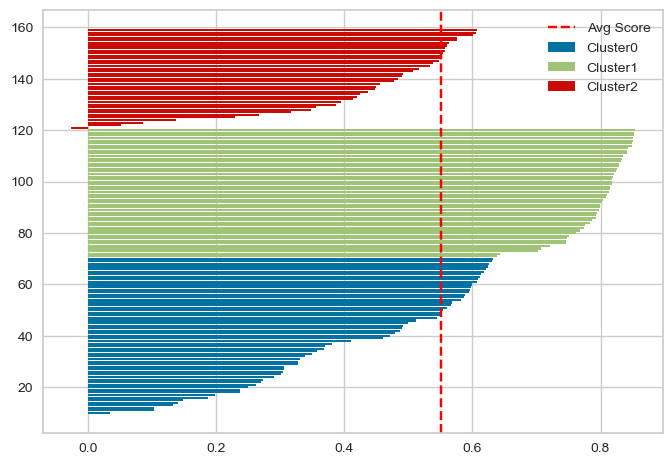

In [24]:
import matplotlib.pyplot as plt
y_lower=10
for i in range(3):
  cluster_i = score_sample[iris_df['cluster']==i]
  cluster_i.sort()
  y_upper = y_lower + len(cluster_i)
  plt.barh(range(y_lower, y_upper), cluster_i, label=f'Cluster{i}')
  y_lower = y_upper

avg_score = silhouette_score(iris.data, iris_df['cluster'])
plt.axvline(avg_score, color='red', linestyle='--', label='Avg Score')
plt.legend()
plt.show()

### 엘보우차트

In [25]:
# SSE값
KM.inertia_

78.85566582597728

In [26]:
scree_df = iris_df [['sepal_length' ,'sepal_width' ,'petal_length' ,'petal_width']]

In [64]:
scree_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:14

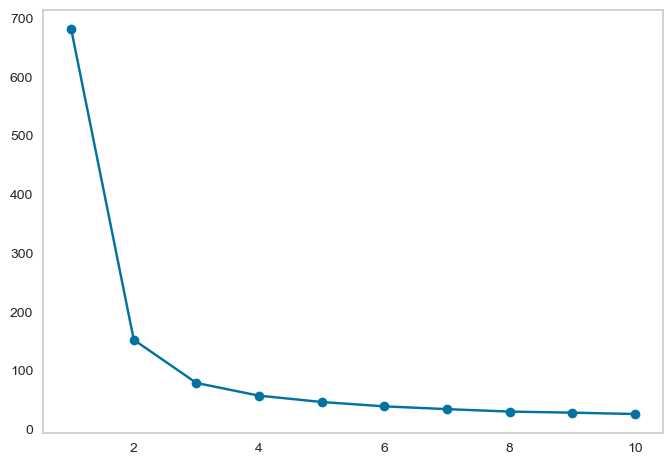

In [42]:
inertia = []
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters= k, n_init= 10, random_state= 42)
    kmeans.fit(scree_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(k_values, inertia, marker = 'o')
plt.grid()
plt.show()

### PCA 차원축소

- 두개의 주성분으로 축소

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformd = pca.fit_transform(iris.data)
pca_transformd.shape

(150, 2)

In [32]:
iris_df['pca_x'] = pca_transformd[:,0]
iris_df['pca_y'] = pca_transformd[:,1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_codff,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755


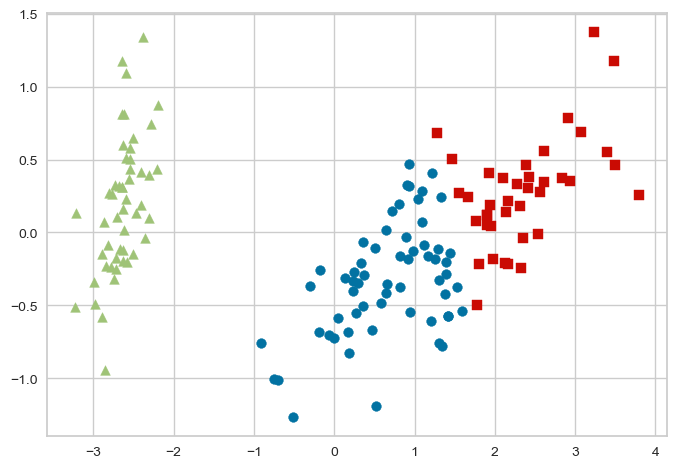

In [34]:
# 시각화
plt.scatter(x = iris_df.loc[iris_df['cluster']==0,'pca_x'],
            y = iris_df.loc[iris_df['cluster']==0, 'pca_y'],marker = 'o')

plt.scatter(x = iris_df.loc[iris_df['cluster']==1,'pca_x'],
            y = iris_df.loc[iris_df['cluster']==1, 'pca_y'],marker = '^')

plt.scatter(x = iris_df.loc[iris_df['cluster']==2,'pca_x'],
            y = iris_df.loc[iris_df['cluster']==2, 'pca_y'],marker = 's')

In [ ]:
# 주성분의 설명력
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [105]:
from sklearn.preprocessing import StandardScaler
iris_caled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])
iris_caled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 , -1.22474487,
         0.18259934,  1.35832938, -1.30971087],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 , -1.22474487,
         0.18259934,  1.18857506, -1.32435711],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 , -1.22474487,
         0.18259934,  1.25113184, -1.40967409]])

In [106]:
from sklearn.decomposition import PCA
pca_scaled = PCA(n_components=2)
pca_transformed_scaled =  pca_scaled.fit_transform(iris_caled)
#주성분1, 주성분2
iris_df['pca_scaled_x'] = pca_transformed_scaled[:, 0]
iris_df['pca_scaled_y'] = pca_transformed_scaled[:, 1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_codff,pca_x,pca_y,pca_scaled_x,pca_scaled_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397,-3.152120,0.710720
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001,-2.970722,-0.083819
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949,-3.230879,0.139873
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299,-3.116799,-0.053567
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755,-3.245118,0.811202


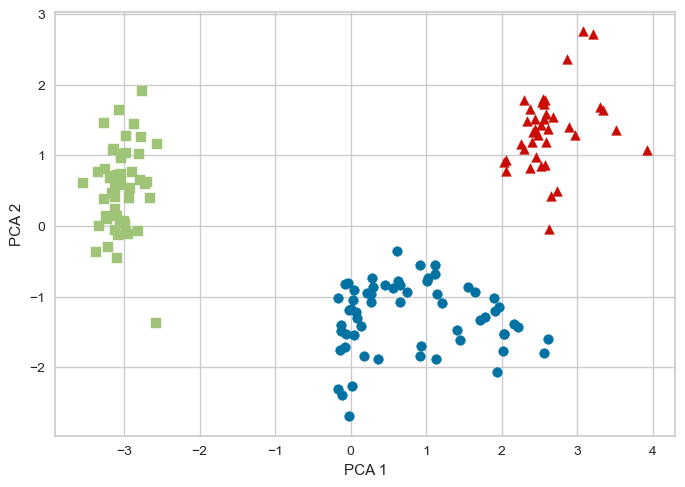

In [107]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_y'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_y'], marker='s')
plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_y'], marker='^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### 클러스터링 연습

In [93]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(cancer_df)

In [95]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled)

In [ ]:
pca_df = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2'])

In [97]:
pca_df

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


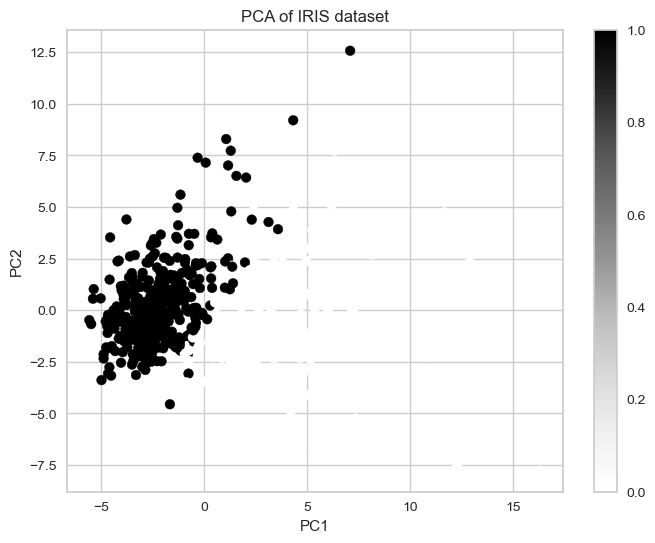

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=cancer.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of IRIS dataset')
plt.colorbar()
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


첫번째 주성분: 약 44%

두번째 주성분: 약 18%

누적 설명력: 약 63% 정도의 분산을 유지한다는 뜻

보통 80프로 이상이 되도록 주성분의 개수를 더 쓰는게 일반적

현재 암데이터는 30가지의 피쳐가 있는데 2차원 상에서 데이터를 본 결과 데이터가 몰려 있어서 분류가 어려울 것이라고 예상된다.

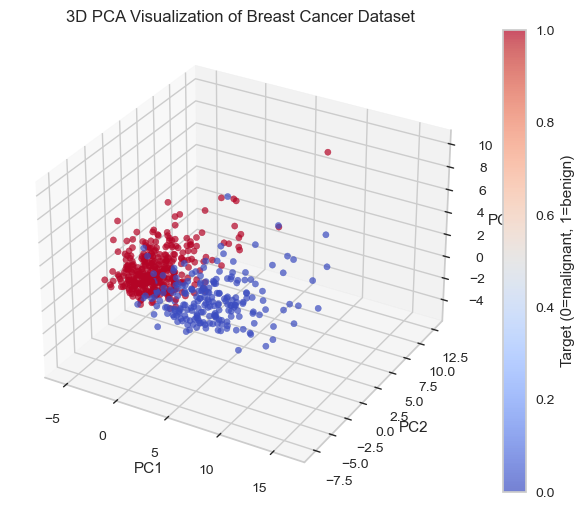

Explained variance ratio: [0.44272026 0.18971182 0.09393163]
Cumulative explained variance: 0.7263637090876767


In [102]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D 그래프용

# 1) 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target  # 클래스(양성/악성)

# 2) 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) PCA 3개 주성분으로 축소
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 4) 3D 시각화
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, cmap='coolwarm', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Visualization of Breast Cancer Dataset')
plt.colorbar(scatter, label='Target (0=malignant, 1=benign)')
plt.show()

# 5) 설명된 분산 비율 출력
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.sum())


주성분별 설명된 분산 비율: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
누적: 0.9100953006755698


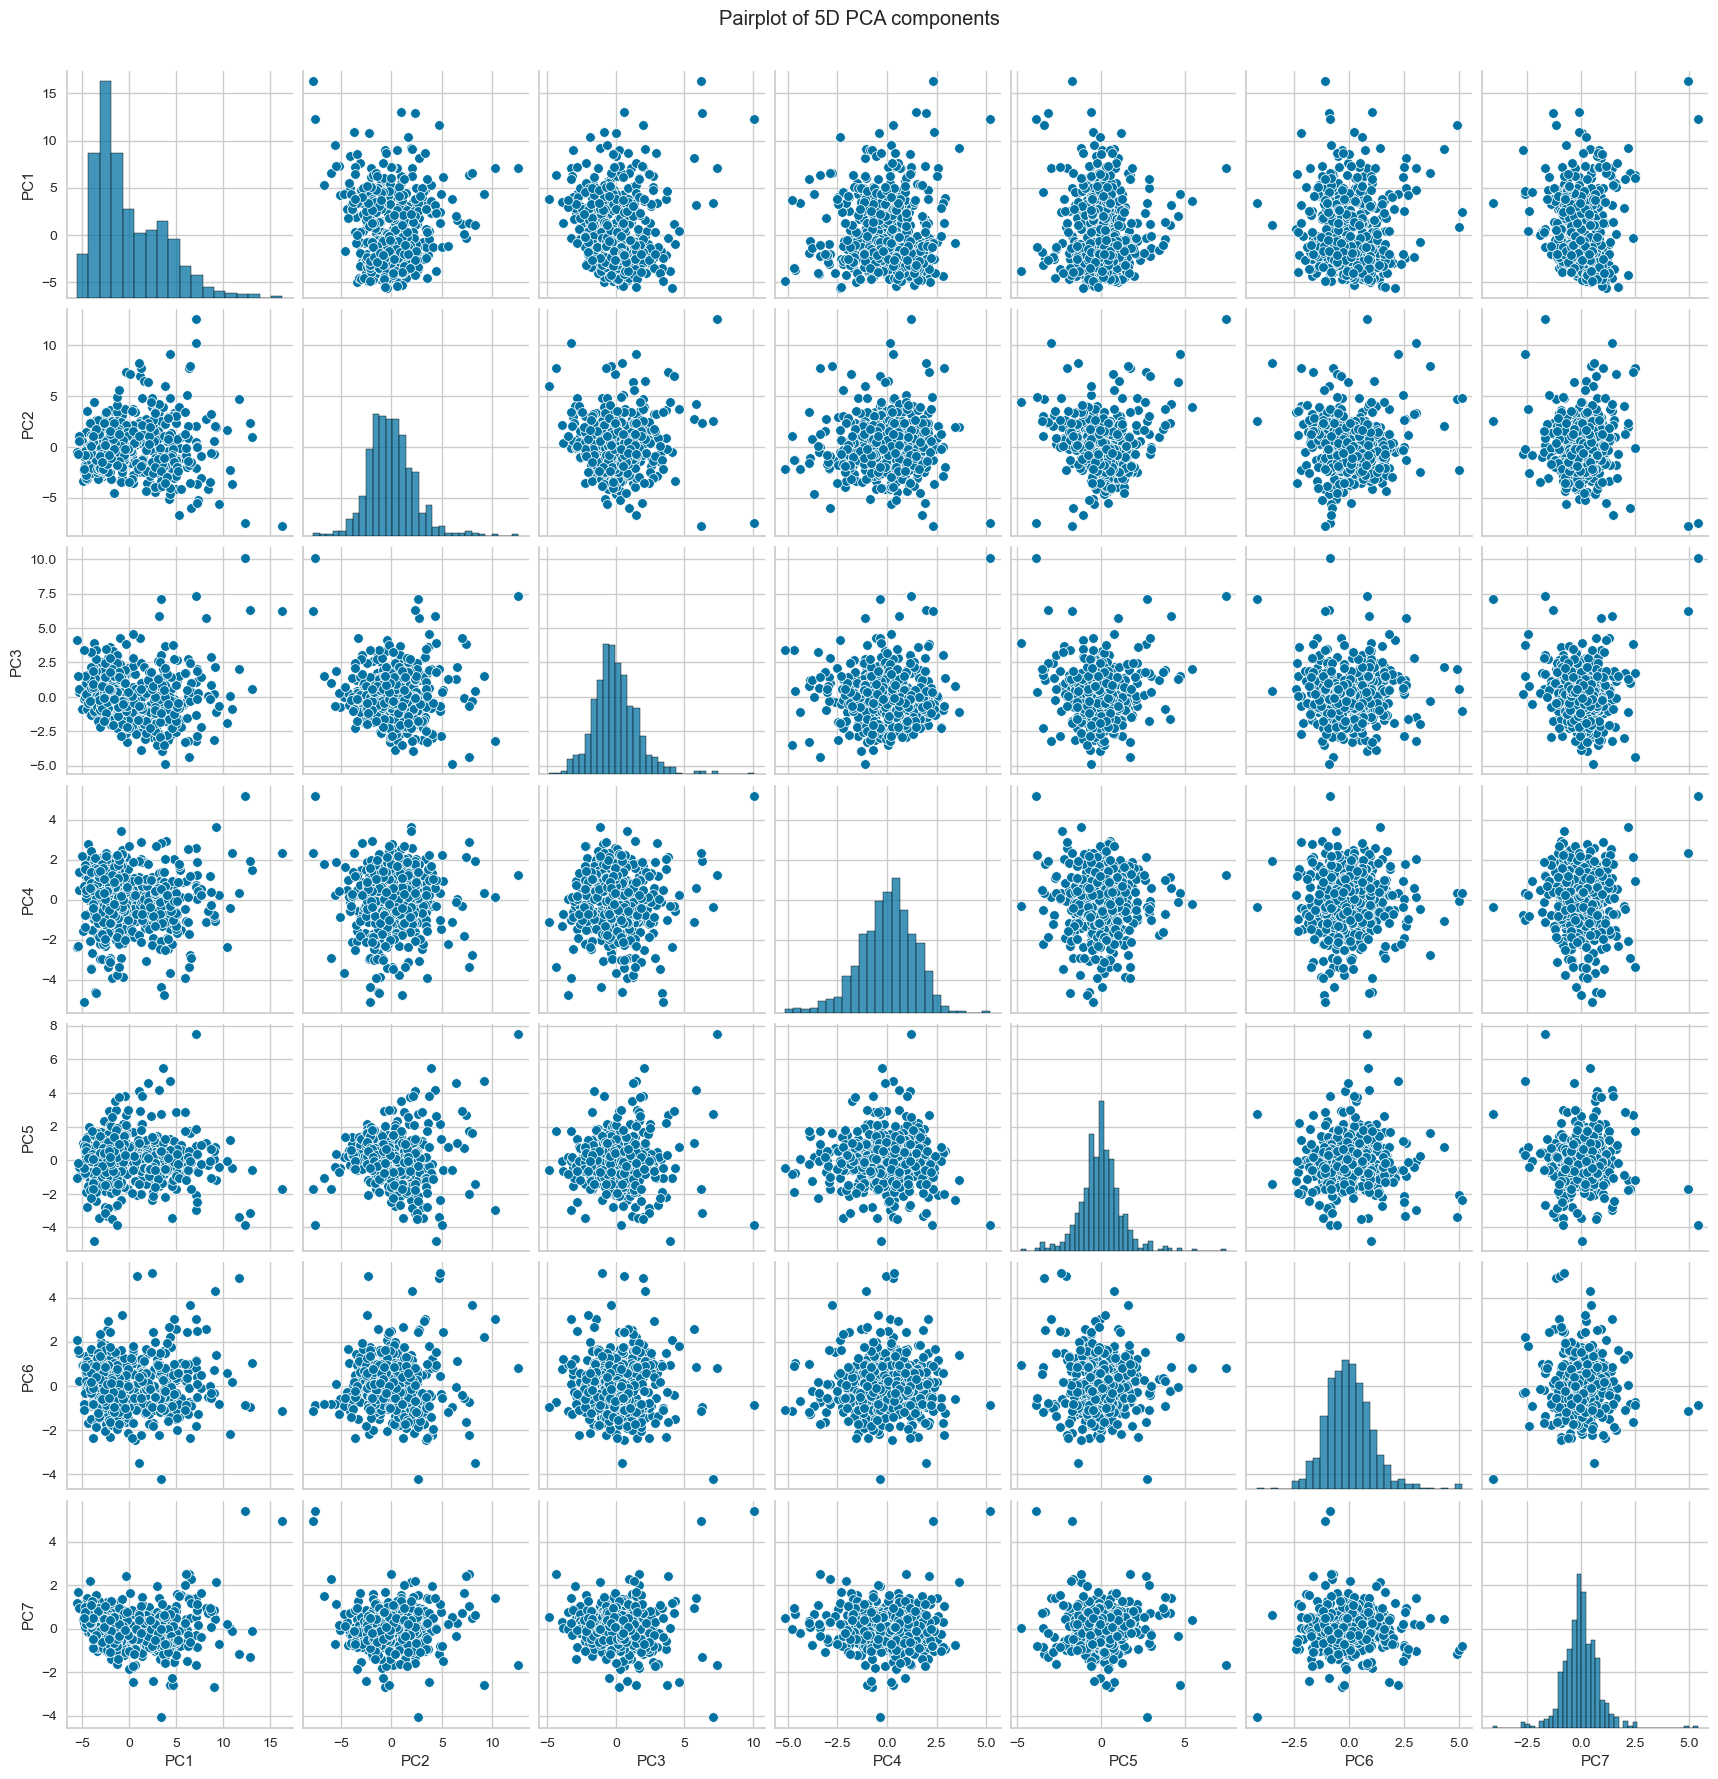

In [112]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 2D
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

print('주성분별 설명된 분산 비율:', pca.explained_variance_ratio_)
print('누적:', pca.explained_variance_ratio_.sum())

# 시각화
# PCA 결과를 DataFrame으로 변환
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(7)])

# Pairplot 그리기 (2차원 조합 모두 시각화)
import seaborn as sns
sns.pairplot(pca_df)
plt.suptitle('Pairplot of 5D PCA components', y=1.02)
plt.show()

In [113]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

# 1) 데이터 로드
data = load_breast_cancer()
X = data.data

# 2) 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) PCA (7개 주성분)
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

print("주성분별 설명 분산 비율:", pca.explained_variance_ratio_)
print("누적 설명 분산:", pca.explained_variance_ratio_.sum())

# 4) K-Means 군집분석 (군집 개수는 예시로 2개)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# 5) 결과를 DataFrame으로
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(7)])
pca_df['Cluster'] = clusters

print(pca_df.head())


주성분별 설명 분산 비율: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
누적 설명 분산: 0.9100953006924606
        PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411423  2.159374   
1  2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028658  0.013356   
2  5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541453 -0.668145   
3  7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053421  1.429923   
4  3.935302  -1.948072  1.389767  2.940639  0.546748 -1.226496 -0.936227   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [ ]:
# 실루엣 계수 수치
score = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.3708


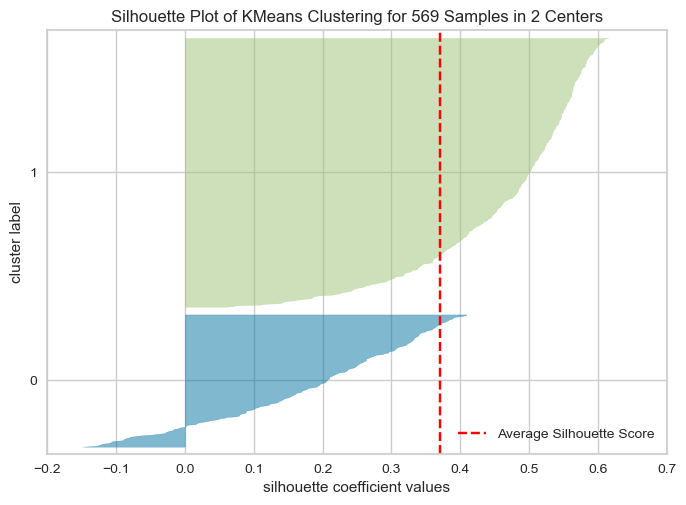

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# 실루엣 계수 시각화
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_pca)
visualizer.show()

주성분의 분산 누적 비율이 0.91인 주성분의 개수는 7개이므로 차원은 7차원 상에서 암, 암이 아님(0,1) 두개의 집단으로 분류하는 k-means 분석을 사용.

결과적으로 실루엣 계수는 0.37으로 약간의 군집 구조는 가지고 있지만 모호하게 분리가 되었고, 0으로 분류된 것들 중 음수가 있는 것을 봐서 잘못된 군집에 배정되어 있을 가능성이 있다는 것을 알 수 있다.